# Imports

In [1]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt

# Toxicity scores per State

In [2]:
#toxicities = '{"AC": [0.5, 0.4], "AL": [0.5, 0.48], "AM": [0.265, 0.4654], "AP": [0.5, 0.455], "BA": [0.5546, 0.4], "CE": [0.5, 0.466], "DF": [0.65445415, 0.4], "ES": [0.76485, 0.4644], "GO": [0.115, 0.114], "MA": [0.885, 0.4], "MG": [0.5, 0.4], "MS": [0.588, 0.4], "MT": [0.5, 0.4], "PA": [0.5, 0.4], "PB": [0.5, 0.4], "PE": [0.5, 0.4], "PI": [0.5, 0.4], "PR": [0.5, 0.4], "RJ": [0.5, 0.4], "RN": [0.5, 0.4], "RO": [0.5, 0.4], "RR": [0.5, 0.4], "RS": [0.5, 0.4], "SC": [0.5, 0.4], "SE": [0.5, 0.4], "SP": [0.5, 0.4], "TO": [0.5, 0.4]}'
import json

with open('dataExtra.json', 'r') as f:
    toxicitiesExtra = json.load(f)

with open('dataAug.json', 'r') as f:
    toxicitiesAug = json.load(f)
    
print(len(toxicitiesAug))

with open('dataSep.json', 'r') as f:
    toxicitiesSep = json.load(f)

print(len(toxicitiesSep))

with open('dataOct.json', 'r') as f:
    toxicitiesOct = json.load(f)
    
print(len(toxicitiesOct))

for key in toxicitiesAug.keys():
    for listElement in toxicitiesSep.get(key) + toxicitiesOct.get(key) + toxicitiesExtra.get(key):
        toxicitiesAug.get(key).append(listElement)
        

toxicities_dict = toxicitiesAug

count = 0
for key in toxicities_dict:
    x = len(toxicities_dict[key])
    print(key + ": " + str(x))
    count += x

print()
print("total amount of tweets after geo filter: " + str(count))
print()
print(toxicities_dict)

27
27
27
AC: 232
AL: 3566
AP: 523
AM: 2133
BA: 5337
CE: 4896
DF: 5683
ES: 2282
GO: 2384
MA: 2370
MT: 760
MS: 310
MG: 10018
PA: 861
PB: 2375
PR: 4493
PE: 4963
PI: 792
RJ: 17966
RN: 1748
RS: 6322
RO: 357
RR: 6
SC: 6350
SP: 21267
SE: 626
TO: 173

total amount of tweets after geo filter: 108793

{'AC': [0.038852096, 0.800372, 0.6925407, 0.08244847, 0.35314363, 0.47369906, 0.012811388, 0.8223625, 0.67148936, 0.71887034, 0.61089075, 0.74742997, 0.67148936, 0.86052006, 0.5587586, 0.7921174, 0.800372, 0.800372, 0.78985506, 0.74722743, 0.71166986, 0.3389984, 0.71210396, 0.7822916, 0.28046355, -1, 0.16477858, 0.092298105, -1, 0.030224552, 0.800372, 0.19611198, 0.07957855, 0.055042017, 0.051588226, 0.007641494, 0.012811388, 0.16477858, 0.14269894, -1, 0.038852096, 0.049831573, 0.0060317097, 0.20303296, 0.0060002944, 0.055521555, 0.10332008, 0.032778896, 0.09351514, 0.020166516, 0.099415205, 0.038852096, 0.8674699, 0.28004074, 0.07503674, 0.038852096, 0.04341242, 0.57963264, 0.099415205, 0.0466620

In [3]:
for state in toxicities_dict:
    print(toxicities_dict[state]) 

[0.038852096, 0.800372, 0.6925407, 0.08244847, 0.35314363, 0.47369906, 0.012811388, 0.8223625, 0.67148936, 0.71887034, 0.61089075, 0.74742997, 0.67148936, 0.86052006, 0.5587586, 0.7921174, 0.800372, 0.800372, 0.78985506, 0.74722743, 0.71166986, 0.3389984, 0.71210396, 0.7822916, 0.28046355, -1, 0.16477858, 0.092298105, -1, 0.030224552, 0.800372, 0.19611198, 0.07957855, 0.055042017, 0.051588226, 0.007641494, 0.012811388, 0.16477858, 0.14269894, -1, 0.038852096, 0.049831573, 0.0060317097, 0.20303296, 0.0060002944, 0.055521555, 0.10332008, 0.032778896, 0.09351514, 0.020166516, 0.099415205, 0.038852096, 0.8674699, 0.28004074, 0.07503674, 0.038852096, 0.04341242, 0.57963264, 0.099415205, 0.046662025, 0.053506177, 0.16477858, 0.21750991, 0.012811388, 0.038852096, 0.546455, 0.78985506, 0.7245611, 0.28160906, -1, 0.08386731, -1, 0.800372, 0.28004074, 0.8674699, 0.08172372, 0.33483845, 0.099415205, 0.08244847, 0.061996367, 0.055042017, -1, 0.666648, 0.099415205, 0.16477858, 0.099415205, 0.542386

In [4]:
toxicities_average = {}
amountOfTweets = {}

x = 0
for state in toxicities_dict:
    toxicities_dict[state] = list(filter(lambda s: s>=0, toxicities_dict[state]))
    x+= len(toxicities_dict[state])

print("before language filter: " + str(count))
print("after language filter: " + str(x))
print("lost due to language: " + str(count - x) + " | " + str((count-x)*100/count) + "%")

for state in toxicities_dict:
    if (len(toxicities_dict[state]) == 0):
        toxicities_average[state] = -1
        continue
    amountOfTweets[state] = len(toxicities_dict[state])
    toxicities_average[state] = sum(toxicities_dict[state]) / len(toxicities_dict[state])

before language filter: 108793
after language filter: 101659
lost due to language: 7134 | 6.557407186124108%


In [5]:
print(toxicities_average)

{'AC': 0.3186106315301888, 'AL': 0.2876213350825276, 'AP': 0.22129739958545114, 'AM': 0.2772108240003962, 'BA': 0.2893552570051616, 'CE': 0.25862992155326137, 'DF': 0.2337507789794536, 'ES': 0.20439704032652936, 'GO': 0.21851475285787625, 'MA': 0.21557216927505687, 'MT': 0.23677668239578276, 'MS': 0.2753833941178323, 'MG': 0.3217067843866521, 'PA': 0.2662610097346204, 'PB': 0.25777036105710516, 'PR': 0.2710790594245368, 'PE': 0.2930173727920724, 'PI': 0.2757878608625673, 'RJ': 0.2648033229654508, 'RN': 0.2578429392231724, 'RS': 0.2499921106082541, 'RO': 0.20490332043152862, 'RR': 0.28322285333333336, 'SC': 0.3272922229455228, 'SP': 0.26749128946068323, 'SE': 0.22748000767886611, 'TO': 0.31576740432934103}


In [6]:
def unicode_csv_reader(unicode_csv_data, dialect=csv.excel, **kwargs):
    # csv.py doesn't do Unicode; encode temporarily as UTF-8:
    csv_reader = csv.reader(utf_8_encoder(unicode_csv_data),
                            dialect=dialect, **kwargs)
    for row in csv_reader:
        # decode UTF-8 back to Unicode, cell by cell:
        yield [unicode(cell, 'utf-8') for cell in row]

def utf_8_encoder(unicode_csv_data):
    for line in unicode_csv_data:
        yield line.encode('utf-8')

# Abstention data per state

In [7]:
data = csv.reader(open('data_elections/quantitativo_comp_abst-uf_2022_1.csv', newline=''), delimiter=',', quotechar='|')
dataarr = []
datadict = {}
skip = True
for row in data:
    if skip:
        skip = False
        continue
    datadict[row[3]] = float(row[8])
    dataarr.append([row[3], float(row[8]), int(row[6])])
    #State, Percentage abstention, Quantity abstention
del datadict["ZZ"]
print(datadict)

{'AC': 0.224197147, 'AL': 0.223740742, 'AM': 0.201183043, 'AP': 0.19502367, 'BA': 0.213323741, 'CE': 0.174492312, 'DF': 0.175668223, 'ES': 0.207576503, 'GO': 0.217173741, 'MA': 0.2219005, 'MG': 0.222752376, 'MS': 0.22077375, 'MT': 0.233762747, 'PA': 0.212122134, 'PB': 0.172911591, 'PE': 0.182002873, 'PI': 0.176788108, 'PR': 0.194846355, 'RJ': 0.227417766, 'RN': 0.18153838, 'RO': 0.24638603, 'RR': 0.16704893, 'RS': 0.197787645, 'SC': 0.184503479, 'SE': 0.18344169, 'SP': 0.216184341, 'TO': 0.185369693}


In [8]:
final_dict = {}

toxicities_sorted = dict(sorted(toxicities_average.items(), key=lambda x:x[1]))

for state in toxicities_sorted:
    final_dict[state] = [toxicities_sorted[state], datadict[state]]

print(final_dict)

{'ES': [0.20439704032652936, 0.207576503], 'RO': [0.20490332043152862, 0.24638603], 'MA': [0.21557216927505687, 0.2219005], 'GO': [0.21851475285787625, 0.217173741], 'AP': [0.22129739958545114, 0.19502367], 'SE': [0.22748000767886611, 0.18344169], 'DF': [0.2337507789794536, 0.175668223], 'MT': [0.23677668239578276, 0.233762747], 'RS': [0.2499921106082541, 0.197787645], 'PB': [0.25777036105710516, 0.172911591], 'RN': [0.2578429392231724, 0.18153838], 'CE': [0.25862992155326137, 0.174492312], 'RJ': [0.2648033229654508, 0.227417766], 'PA': [0.2662610097346204, 0.212122134], 'SP': [0.26749128946068323, 0.216184341], 'PR': [0.2710790594245368, 0.194846355], 'MS': [0.2753833941178323, 0.22077375], 'PI': [0.2757878608625673, 0.176788108], 'AM': [0.2772108240003962, 0.201183043], 'RR': [0.28322285333333336, 0.16704893], 'AL': [0.2876213350825276, 0.223740742], 'BA': [0.2893552570051616, 0.213323741], 'PE': [0.2930173727920724, 0.182002873], 'TO': [0.31576740432934103, 0.185369693], 'AC': [0.31

In [9]:
tox = []
abst = []
states = []

for state in final_dict:
    if (final_dict[state][0] == -1):
        continue
    tox.append(final_dict[state][0])
    abst.append(final_dict[state][1])
    states.append(state + ": " + str(amountOfTweets[state]))

# Calculation of correlation

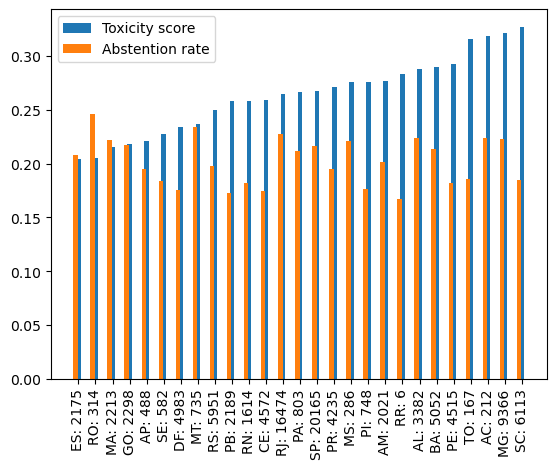

Correlation: -0.16132880360529378


In [10]:
xposT = []
xposA = []

for i in range(len(states)):
    xposT.append(3*i+1)
    xposA.append(3*i+0.5)

plt.bar(xposT, tox, label='Toxicity score')
plt.bar(xposA, abst, label='Abstention rate')
plt.xticks(xposT, states, rotation=90)
plt.legend()

plt.show()

#calculate the correlation between the two arrays
print("Correlation: " + str(np.corrcoef(tox, abst)[0,1]))

# Outcome per state

In [11]:
dataOutcome = csv.reader(open('data_elections/votacao-uf_presidente_2022-1.csv', newline='', encoding='utf-8'), delimiter=',', quotechar='|')
#0: state, 5: candidate, 17: %votes
Bolsonarodict = {}
Luladict = {}
for row in dataOutcome:
    if (row[5] == "LULA"):
        Luladict[row[0]] = float(row[16])
        continue
    elif (row[5] == "JAIR BOLSONARO"):
        Bolsonarodict[row[0]] = float(row[16])
        continue
    else:
        print("invalid")
del Luladict["ZZ"]
del Bolsonarodict["ZZ"]
print(Luladict)
print(Bolsonarodict)

invalid
{'AC': 0.296997918, 'AL': 0.586805818, 'AM': 0.510995397, 'AP': 0.486389305, 'BA': 0.721221553, 'CE': 0.699675399, 'DF': 0.411885401, 'ES': 0.419558135, 'GO': 0.412864951, 'MA': 0.711357298, 'MG': 0.502013011, 'MS': 0.40505745, 'MT': 0.349173797, 'PA': 0.547478834, 'PB': 0.666243702, 'PE': 0.669318068, 'PI': 0.768601916, 'PR': 0.376031286, 'RJ': 0.434745684, 'RN': 0.650970039, 'RO': 0.293373803, 'RR': 0.239191009, 'RS': 0.436503439, 'SC': 0.307285658, 'SE': 0.672060852, 'SP': 0.447609266, 'TO': 0.513553372}
{'AC': 0.703002082, 'AL': 0.413194182, 'AM': 0.489004603, 'AP': 0.513610695, 'BA': 0.278778447, 'CE': 0.300324601, 'DF': 0.588114599, 'ES': 0.580441865, 'GO': 0.587135049, 'MA': 0.288642702, 'MG': 0.497986989, 'MS': 0.59494255, 'MT': 0.650826203, 'PA': 0.452521166, 'PB': 0.333756298, 'PE': 0.330681932, 'PI': 0.231398084, 'PR': 0.623968714, 'RJ': 0.565254316, 'RN': 0.349029961, 'RO': 0.706626197, 'RR': 0.760808991, 'RS': 0.563496561, 'SC': 0.692714342, 'SE': 0.327939148, 'SP'

In [12]:
final_Luladict = {}
final_Bolsonarodict = {}

toxicities_sorted = dict(sorted(toxicities_average.items(), key=lambda x:x[1]))

for state in toxicities_sorted:
    final_Luladict[state] = [toxicities_sorted[state], Luladict[state]]
    final_Bolsonarodict[state] = [toxicities_sorted[state], Bolsonarodict[state]]

print(final_Luladict)
print()
print(final_Bolsonarodict)

{'ES': [0.20439704032652936, 0.419558135], 'RO': [0.20490332043152862, 0.293373803], 'MA': [0.21557216927505687, 0.711357298], 'GO': [0.21851475285787625, 0.412864951], 'AP': [0.22129739958545114, 0.486389305], 'SE': [0.22748000767886611, 0.672060852], 'DF': [0.2337507789794536, 0.411885401], 'MT': [0.23677668239578276, 0.349173797], 'RS': [0.2499921106082541, 0.436503439], 'PB': [0.25777036105710516, 0.666243702], 'RN': [0.2578429392231724, 0.650970039], 'CE': [0.25862992155326137, 0.699675399], 'RJ': [0.2648033229654508, 0.434745684], 'PA': [0.2662610097346204, 0.547478834], 'SP': [0.26749128946068323, 0.447609266], 'PR': [0.2710790594245368, 0.376031286], 'MS': [0.2753833941178323, 0.40505745], 'PI': [0.2757878608625673, 0.768601916], 'AM': [0.2772108240003962, 0.510995397], 'RR': [0.28322285333333336, 0.239191009], 'AL': [0.2876213350825276, 0.586805818], 'BA': [0.2893552570051616, 0.721221553], 'PE': [0.2930173727920724, 0.669318068], 'TO': [0.31576740432934103, 0.513553372], 'AC'

In [13]:
Lula = []
Bolsonaro = []

for state in final_Luladict:
    if (final_Luladict[state][0] == -1):
        continue
    Lula.append(final_Luladict[state][1])
    Bolsonaro.append(final_Bolsonarodict[state][1])

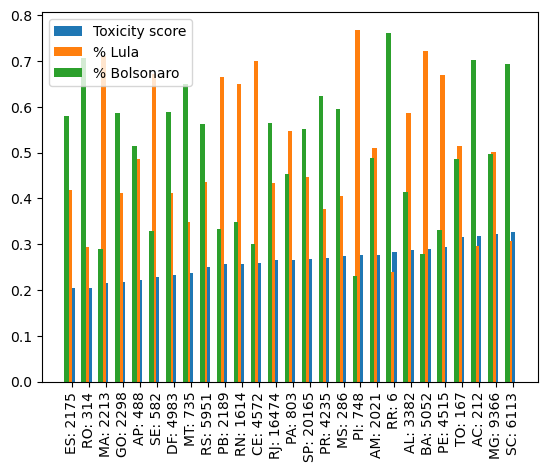

Correlation Lula-tox: -0.02893084906854532
Correlation Bolsonaro-tox: 0.028930849068545393


In [14]:
xposT2 = []
xposL = []
xposB = []

for i in range(len(states)):
    xposT2.append(3*i+1.5)
    xposL.append(3*i+1)
    xposB.append(3*i+0.5)

plt.bar(xposT2, tox, label='Toxicity score')
plt.bar(xposL, Lula, label='% Lula')
plt.bar(xposB, Bolsonaro, label='% Bolsonaro')
plt.xticks(xposT2, states, rotation=90)
plt.legend()

plt.show()

#calculate the correlation between the two arrays
print("Correlation Lula-tox: " + str(np.corrcoef(tox, Lula)[0,1]))
print("Correlation Bolsonaro-tox: " + str(np.corrcoef(tox, Bolsonaro)[0,1]))

In [15]:
diff = []

for state in final_Luladict:
    if (final_Luladict[state][0] == -1):
        continue
    diff.append(abs(final_Luladict[state][1] - final_Bolsonarodict[state][1]))

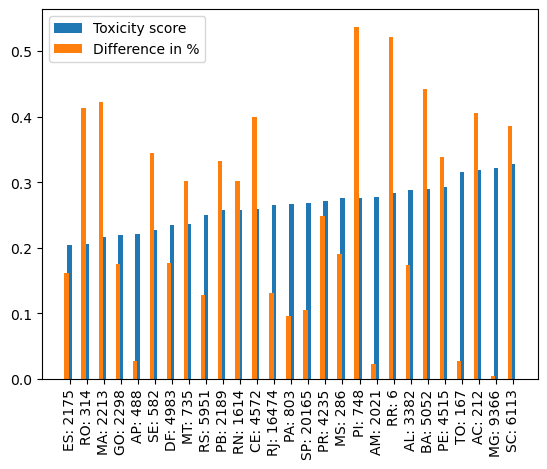

Correlation Difference-tox: -0.00892899028571018


In [16]:
xposT3 = []
xposD = []

for i in range(len(states)):
    xposT3.append(3*i+1)
    xposD.append(3*i+0.5)

plt.bar(xposT3, tox, label='Toxicity score')
plt.bar(xposD, diff, label='Difference in %')
plt.xticks(xposT3, states, rotation=90)
plt.legend()

plt.show()

#calculate the correlation between the two arrays
print("Correlation Difference-tox: " + str(np.corrcoef(tox, diff)[0,1]))